In [5]:
using LinearAlgebra
using Plots

In [18]:
function Harr(n)
    z = (randn(n,n) + im*randn(n,n))/sqrt(2.0)
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

Harr (generic function with 1 method)

In [19]:
Harr(3)

3×3 Array{Complex{Float64},2}:
  0.561394+0.278704im   -0.202345+0.334435im    0.63139-0.236045im
 -0.138405-0.0642705im   0.779908-0.197312im   0.557315+0.137568im
  0.755154-0.116688im   0.0853065-0.439026im  -0.203858+0.417788im

In [20]:
function HarR(n)
    z = (randn(n,n))
    Q,R= qr(z)
    d=Diagonal(R)
    ph = d/abs.(d)
    RR=Q*ph*Q
    return RR
end

HarR (generic function with 1 method)

In [42]:
λ=Complex{Float64}[]
for i in 1:50000
    append!(λ,eigvals(HarR(100)))
end

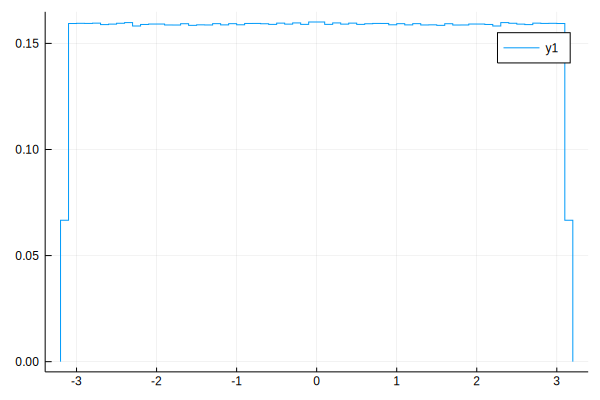

In [43]:
histogram(angle.(lam_eigenvals_C(λ)),normalized=true,bins=60)

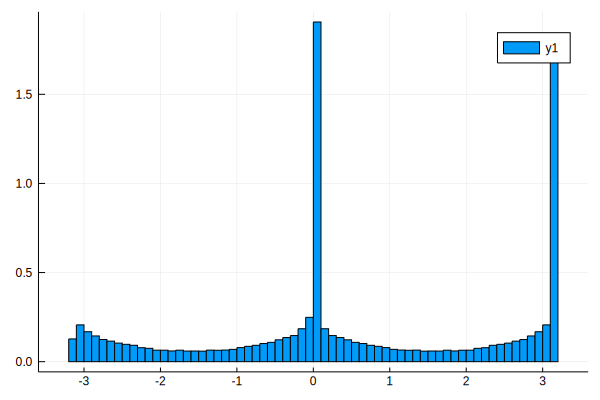

In [23]:
histogram(angle.(λ),normalized=true,bins=60)

In [26]:
scatter(real(λ),imag(λ),aspect_ratio=:equal);

UndefVarError: UndefVarError: scatter not defined

In [27]:
function lam_eigenvals_C(λ::Array{Complex{Float64},1})
    λr=Complex{Float64}[]
    for i=1:length(λ)
        if imag(λ[i]) != 0
            push!(λr,λ[i])
        end
    end
    return λr
end

lam_eigenvals_C (generic function with 1 method)

In [28]:
eigvals(Harr(2))

2-element Array{Complex{Float64},1}:
 -0.6564400011216365 + 0.7543782373103193im
   0.948069369307753 - 0.3180636272515287im

In [29]:
HarR(2)

2×2 Array{Float64,2}:
 -1.0           1.38778e-17
  2.77556e-17  -1.0        

In [30]:
λ2=Complex{Float64}[]
for i=1:10000
    n=randn()
    R2=[cos(n) -sin(n); sin(n) cos(n)]
    append!(λ2,eigvals(R2))
end

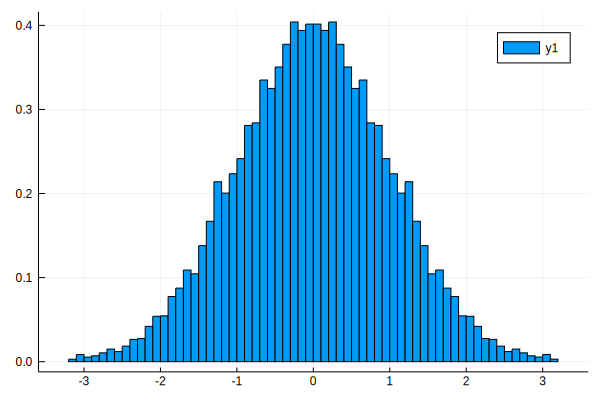

In [31]:
histogram(angle.(λ2),normalized=true,bins=60)

In [32]:
using Distributions

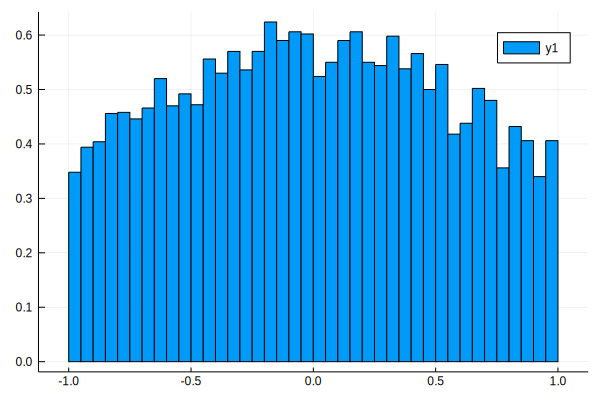

In [33]:
mu = 0    #The mean of the truncated Normal
sigma = 1 #The standard deviation of the truncated Normal
lb = -1    #The truncation lower bound
ub = 1    #The truncation upper bound
d = Truncated(Normal(mu, sigma), lb, ub)  #Construct the distribution type
x = rand(d,10000) #Simulate 100 obs from the truncated Normal
histogram(x,normalized=true,bins=60)

In [38]:
λ2=Complex{Float64}[]
for i=1:100000
    a=rand(d)
    b=rand(d)
    R2=[a -b; b a ]
    append!(λ2,eigvals(R2))
end

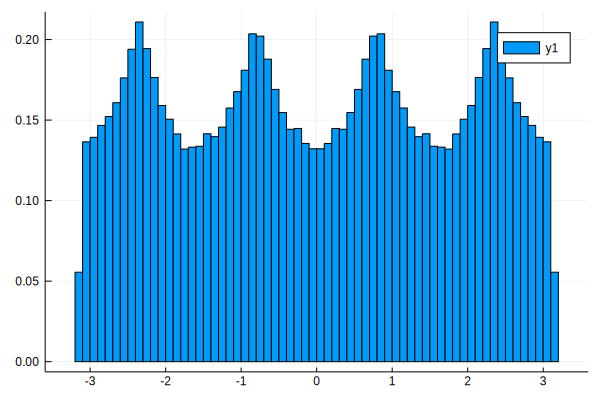

In [39]:
histogram(angle.(λ2),normalized=true,bins=60)

In [1]:
using PyPlot

pygui(true)

fig = figure()
ax = fig[:gca](projection="3d")

N = 10
x,y,z,u,v,w = [randn(N) for _ in 1:6]
ax[:quiver](x,y,z, u,v,w)

┌ Warning: `getindex(f::Figure, x)` is deprecated, use `getproperty(f, x)` instead.
│   caller = top-level scope at In[1]:6
└ @ Core In[1]:6


PyCall.PyError: PyError ($(Expr(:escape, :(ccall(#= C:\Users\sebas\.julia\packages\PyCall\zqDXB\src\pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'ValueError'>
ValueError("Unknown projection '3d'",)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\figure.py", line 1863, in gca
    return self.add_subplot(1, 1, 1, **kwargs)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\figure.py", line 1349, in add_subplot
    self, *args, **kwargs)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\projections\__init__.py", line 81, in process_projection_requirements
    projection_class = get_projection_class(projection)
  File "C:\Users\sebas\.julia\conda\3\lib\site-packages\matplotlib\projections\__init__.py", line 60, in get_projection_class
    raise ValueError("Unknown projection %r" % projection)


In [2]:
using PyPlot
